# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results,how='outer',on='Mouse ID')

# Display the data table for preview
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(combined_results_df['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint_df = combined_results_df.groupby(['Mouse ID','Timepoint'], as_index=False)['Sex'].count()
mouse_timepoint_df = mouse_timepoint_df.loc[mouse_timepoint_df['Sex'] == 2]
mouse_timepoint_df['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_results_df.loc[combined_results_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_results_df = combined_results_df.loc[combined_results_df['Mouse ID'] != 'g989']
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_results_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_avg = (combined_results_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()).rename('Mean Tumor Volume')
tumor_volume_med = (combined_results_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()).rename('Median Tumor Volume')
tumor_volume_var = (combined_results_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()).rename('Tumor Volume Variance')
tumor_volume_std = (combined_results_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()).rename('Tumor Volume Std Dev.')
tumor_volume_sem = (combined_results_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()).rename('Tumor Volume Std Err.')

tumor_volume_stats_df = pd.concat([tumor_volume_avg, tumor_volume_med, tumor_volume_var, 
                                   tumor_volume_std, tumor_volume_sem], axis=1)

tumor_volume_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_stat2_df = combined_results_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
tumor_volume_stat2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
drug_mice_count = combined_results_df.groupby(['Drug Regimen'])['Mouse ID'].count()
drug_mice_count = drug_mice_count.sort_values(ascending=False)

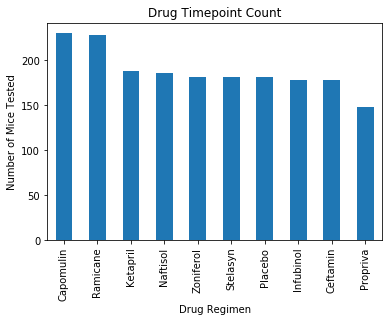

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

dmc = drug_mice_count.plot.bar()
dmc.set_ylabel('Number of Mice Tested')
dmc.set_title('Drug Timepoint Count')
plt.show()


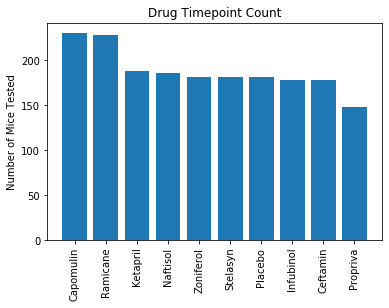

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_mice_count.index, drug_mice_count.values)
plt.title('Drug Timepoint Count')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


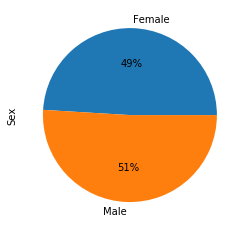

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_results_df.groupby(['Sex'])['Mouse ID'].count().rename('Sex').plot(kind='pie', autopct='%1.0f%%')


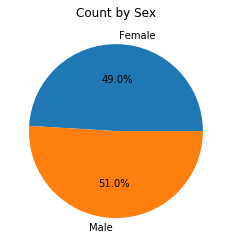

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_series = combined_results_df.groupby(['Sex'])['Mouse ID'].count().rename('count')
labels = sex_series.keys()
labels
plt.pie(x=sex_series, autopct='%.1f%%',labels=labels)
plt.title('Count by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last = combined_results_df.groupby(['Mouse ID'])['Timepoint'].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_final_df = pd.merge(mouse_last, combined_results_df, on=['Mouse ID','Timepoint'])
#mouse_final_df

mouse_final_df = mouse_final_df[mouse_final_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
mouse_final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [175]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Infubinol.quantile([.25,.5,.75])
#quartiles
lowerq = quartiles[0.25]
#lowerq
upperq = quartiles[0.75]
#upperq

iqr = upperq-lowerq
#iqr
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Capomulin.loc[lambda x : (x < lower_bound) | (x > upper_bound) ]
Infubinol.loc[lambda x : (x < lower_bound) | (x > upper_bound) ]

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [209]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#treatment_volume_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in treatments:
    
    
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    iseries = mouse_final_df.loc[mouse_final_df['Drug Regimen']==i]['Tumor Volume (mm3)']    
    iseries.reset_index(drop=True,inplace=True)

    # add subset 
    treatment_volume_df[i] = iseries           
    
    # Determine outliers using upper and lower bounds
    quartiles = iseries.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]   
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    p_series = iseries.loc[lambda x : (x < lower_bound) | (x > upper_bound) ]
    print(f"{i}'s potential outliers {p_series}")

#treatment_volume_df

Capomulin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

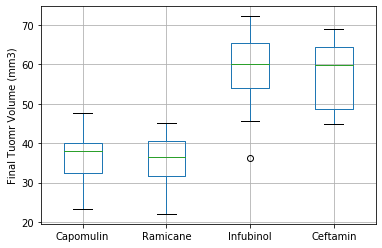

In [131]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_plt = treatment_volume_df.boxplot(column=treatments)
treatment_plt.set_ylabel("Final Tuomr Volume (mm3)")
treatment_plt.plot()
plt.show


## Line and Scatter Plots

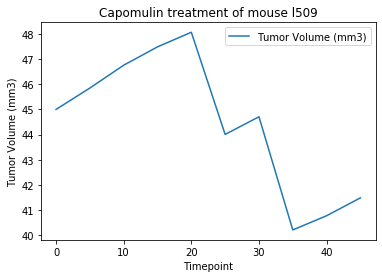

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#combined_results_df['Mouse ID'].unique()
Capomulin_Timepoint_df = combined_results_df.loc[((combined_results_df['Drug Regimen']=='Capomulin') & (combined_results_df['Mouse ID']=='l509'))] [['Tumor Volume (mm3)','Timepoint']]
Capomulin_plt = Capomulin_Timepoint_df.plot('Timepoint',title="Capomulin treatment of mouse l509")
Capomulin_plt.set_ylabel("Tumor Volume (mm3)")
plt.show()

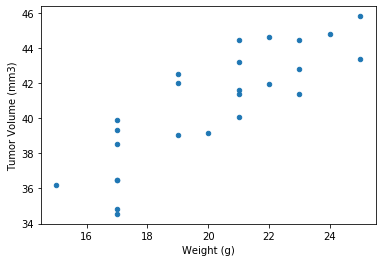

In [192]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_series = combined_results_df.loc[combined_results_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()
#Capomulin_series

Capomulin_series.plot(x='Weight (g)', y='Tumor Volume (mm3)',kind='scatter')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


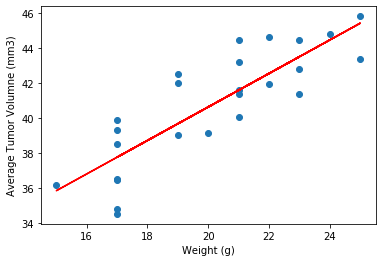

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_series['Weight (g)']
y_values = Capomulin_series['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumne (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()
